This chapter discusses how the following training algorithms behave under the hood: 
- Linear Regression
- Polynomial Regression
- Logistic Regression
- Softmax Regression.

# 1 - Linear Regression

*Equation 1: Linear Regression model prediction*

\begin{equation*}
\hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2\;+\;...\;+\;\theta_nx_n
\end{equation*}

$
\bullet \;\hat{y}\small{\text{ is the predicted value.}}\\
\bullet n\small{\text{ is the number of features.}}\\
\bullet x_i\small{\text{ is the }i^{th}\text{ feature value.}}\\
$

*Equation 2: Linear Regression model prediction (vectorized form)*

\begin{equation*}
\hat{y} = h_\boldsymbol{\theta}(\mathbf{x}) = \boldsymbol{\theta}\cdot\mathbf{x}
\end{equation*}

$
\bullet \;\boldsymbol{\theta}\small{
    \text{ is the model's parameter vector, containing the bias term }
    \theta_0
    \text{ and the feature weights }
    \theta_1
    \text{ to }
    \theta_n
}.\\
\bullet \;\mathbf{x}\small{
    \text{ is the instance's feature vector, containing }
    x_0
    \text{ to }
    x_n
    \text{, with }
    x_0
    \text{ always equal to 1}
}.\\
\bullet \;\boldsymbol{\theta}\cdot\mathbf{x}\small{
    \text{ is the dot product of the vectors }
    \boldsymbol{\theta}
    \text{ and }
    \mathbf{x}
    \text{, which is equal to }
    \theta_0 + \theta_1x_1 + \theta_2x_2\;+\;...\;+\;\theta_nx_n
}.\\
\bullet \;h_\boldsymbol{\theta}\small{
    \text{ is the hypothesis function, using the model parameters }
    \boldsymbol{\theta}
}.\\
$

*Equation 3: Mean Square Error (MSE) cost function for a Linear Regression model*

\begin{equation*}
\text{MSE}(\mathbf{X}, h_\boldsymbol{\theta}) = \frac{1}{m}\sum_{i=1}^m (\boldsymbol{\theta}^\mathrm{T}\mathbf{x}^{(i)}-y^{(i)})^2
\end{equation*}

Training Linear Regression models involves finding a parameter vector that minimizes the Root Mean Square Error (RMSE).

The Normal Equation is a closed-form solution to this problem.

*Equation 4: Normal Equation*

\begin{equation*}
\hat{\boldsymbol{\theta}} = (\mathbf{X}^{\mathrm{T}}\mathbf{X})^{-1}\mathbf{X}^{\mathrm{T}}\mathbf{y}
\end{equation*}

$
\bullet \;\hat{\boldsymbol{\theta}}\small{
    \text{ is the value of }
    \boldsymbol{\theta}
    \text{ that minimizes the cost function }
}.\\
\bullet \;\mathbf{y}\small{
    \text{ is the vector of target values containing }
    y^{(1)}
    \text{ to }
    y^{(m)}
}.\\
$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

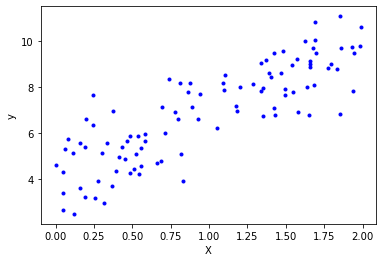

In [10]:
# Linear-ish random data to demonstrate the Normal Equation
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.plot(X, y, 'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [25]:
# Add x0 = 1 to each instance of X
X_b = np.c_[np.ones((100, 1)), X]

# Apply the Normal Equation
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.06419159],
       [2.88986164]])

A perfect solution would be $\theta_0 = 4$ and $\theta_1 = 3$, since the random data was generated using $y = 4 + 3x_1 +$ some Gaussian noise.

In [26]:
# Use the parameter vector to predict y values for x1 = 0 and x1 = 2
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.06419159],
       [9.84391487]])

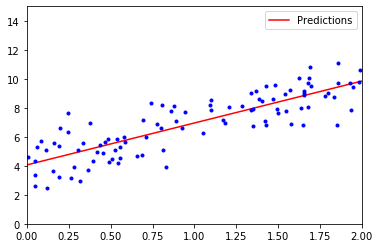

In [27]:
plt.plot(X_new, y_predict, 'r-', label='Predictions')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.legend()
plt.show()

In [28]:
# Using Scikit-Learn's LinearRegression class
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.06419159]), array([[2.88986164]]))

In [29]:
lin_reg.predict(X_new)

array([[4.06419159],
       [9.84391487]])

In [30]:
# LinearRegression is based on scipy's least squares function scipy.linalg.lstsq()
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.06419159],
       [2.88986164]])

scipy.linalg.lstsq() computes $\hat{\boldsymbol{\theta}} = \mathbf{X}^+\mathbf{y}$, where $\mathbf{X}^+$ is the pseudoinverse of $\mathbf{X}$.

In [33]:
# Calculate using the pseudoinverse
np.linalg.pinv(X_b).dot(y)

array([[4.06419159],
       [2.88986164]])

Using the pseudoinverse is both more efficient and more general than the Normal Equation.